# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

**Input**
- $n$ training examples represented with $m$ features
- Number of centroids: $k$

In [2]:
cluster_count = 3

## Synthetic data generator

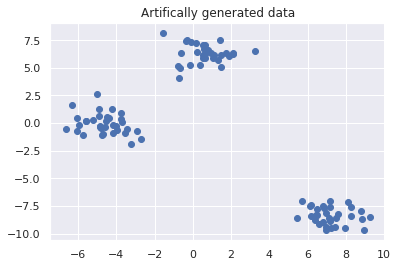

In [81]:
X,y = make_blobs(n_samples=100,centers=cluster_count,n_features= 2)
plt.scatter(X[:,0],X[:,1])
plt.title("Artifically generated data")
plt.show()

**Algorithm**
1. Randomly initialize the k centroids which is a vector in m dimensional space
2. Repeat until converge:

    2a. Assign points to the closest centroids
    2b. Calculate centroids based on points assigned to the cluster

THe algorithm stops when  the centroids do no change or the number of iterations are over

In [82]:
def fit(X,k):
  # Radomly initilaze centroids
  centroids = X[np.random.randint(0,X.shape[0],size = k)]

  # assign random labels to samples according to the distance from centroids
  labels = np.argmin(cdist(X,centroids),axis = 1)

  for _ in range(10):
    previous_labels = labels.copy()

    centroids = np.array([np.mean(X[labels==r],axis = 0) for r in range(k)])

    labels = np.argmin(cdist(X,centroids),axis = 1)

    if all(previous_labels == labels):
      break

  return centroids,labels

In [85]:
centroids, labels = fit(X,cluster_count)

## Plotting the kmeans

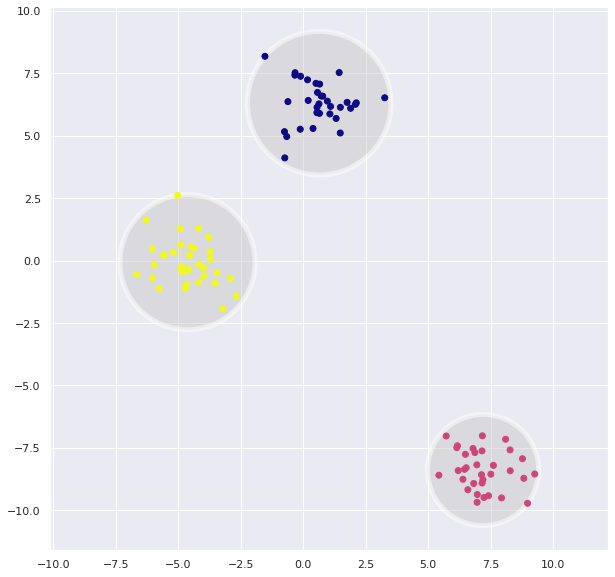

In [90]:
def plot_kmeans(X,centroids,labels,rseed = 0,ax = None):
  ax = ax or plt.gca()
  ax.axis('equal')

  ax.scatter(X[:,0],X[:,1],c = labels,cmap='plasma',zorder=2)
  radii = []

  # radii = [cdist(X[labels==i],[center]).max() for i,center in enumerate(centroids)]
  # for i,center in enumerate(centroids):
  #   distance = cdist(X[labels==1],[center]).max()
  #   radii.append(distance)

  radii = [cdist(X[labels == i],[center]).max() for i,center in enumerate(centroids)]


  for c,r in zip(centroids,radii):
    ax.add_patch(plt.Circle(c,r,fc="#CCCCCC",lw = 5,alpha = 0.5,zorder = 1))

plt.figure(figsize=(10,10))
plot_kmeans(X,centroids,labels)

0 [8.51003076 1.71549948]
1 [-5.13348232 -3.96821106]
2 [-7.44127343  7.22297238]
